#  Installation

In [1]:
import numpy as np
import cv2
import matplotlib.image as mplimage

from urllib.request import urlopen
from functools import reduce
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Helper Functions

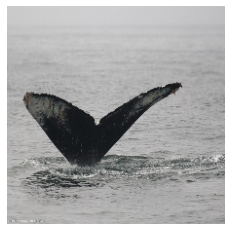

In [ ]:
"""
def loadImage(image_path, format=None):
	# Loads the image at the input path
	return mplimage.imread(image_path, format)
"""
IMG_SIZE = 224

def loadImage(url):
  with urlopen(url) as request:
      img_array = np.asarray(bytearray(request.read()), dtype=np.uint8)

  img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (IMG_SIZE, IMG_SIZE), cv2.INTER_AREA)
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(int)

def showImage(image):
  # Display the image
  plt.axis('off')
  plt.imshow(image)

def transform(image, transform_opts):
  # An ImageDataGenerator instance to be used later to transform the input image.
  datagen = ImageDataGenerator()

  # Apply the transformations to the image.
  return datagen.apply_transform(image, transform_opts)

def transformAndShow(image_path, **transform_opts):
  # Load the image data
  # The data is formatted as (H, W, C)
  image = loadImage(image_path)

  # Transformed Image
  transformed_image = transform(image, transform_opts)

  # Show the transformed image
  showImage(transformed_image.astype(int))
 
#image_path = 'https://www.dropbox.com/s/38s50p5p7063qt0/d7d27395-9004-4ee9-b835-cbbba5353b0c.png?raw=1'
image_path = 'https://farm1.staticflickr.com/4141/4780447561_3959bc024b_o.jpg'
transform_opts = dict()
#transformAndShow(image_path, transform_opts)
transformAndShow(image_path)

# Samples [samples]

In [ ]:
IMG_SIZE = 224
N_CLASSES = 3
sample_urls = [
  ('https://c4.staticflickr.com/8/7296/16386016665_53964c0bee_o.jpg', 'turtle.jpg', 0),
  ('https://farm3.staticflickr.com/4125/4983562261_1d7b59e36e_o.jpg', 'tortoise.jpg', 1),
  ('https://farm1.staticflickr.com/4141/4780447561_3959bc024b_o.jpg', 'whale.jpg', 2)
]

def download_sample(sample):
  url, path, label = sample # Unpack sample
  urlretrieve(url, path) # Download sample image
  return path, label

def load_sample(sample):
  image_path, label = sample
  image = cv2.imread(image_path)
  return image_path, image, label

def resize_sample(sample):
  image_path, image, label = sample
  image = cv2.resize(image, (IMG_SIZE, IMG_SIZE), cv2.INTER_AREA)
  return image_path, image, label

def onehot_encode(sample):
  image_path, image, label = sample
  oh_label = np.zeros(n_classes, dtype=int)
  oh_label[label] = 1

  return image_path, image, oh_label

def save_image(sample):
  image_path, image, label = sample
  png_path = str(Path(image_path).with_suffix(".png"))
  cv2.imwrite(png_path, image)
  return png_path, label

def prepfn(sample, funcs = [download_sample, load_sample, resize_sample, onehot_encode, save_image]):
  return reduce(lambda y,x: x(y), funcs, sample)

samples = map(prepfn, sample_urls)
list(samples)

[('turtle.png', array([1, 0, 0])),
 ('tortoise.png', array([0, 1, 0])),
 ('whale.png', array([0, 0, 1]))]

# Rotation

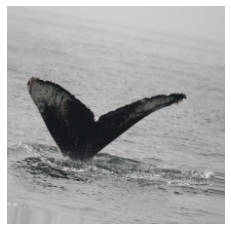

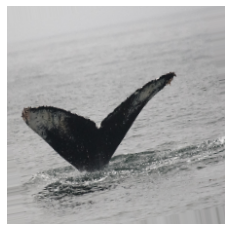

In [ ]:
# Rotate 10 degrees in a clockwise direction
transformAndShow(image_path, theta=10)

# New Chart
plt.figure()

# Rotate 10 degrees in an anti-clockwise direction
transformAndShow(image_path, theta=-10)

# Flip

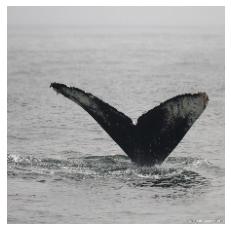

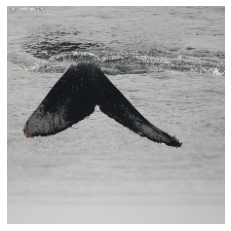

In [ ]:
# Horizontal Flip
transformAndShow(image_path, flip_horizontal=True)

# New Chart
plt.figure()

# Vertical Flip
transformAndShow(image_path, flip_vertical=True)

# Shear

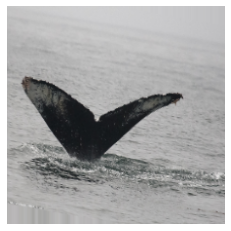

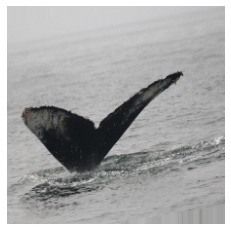

In [ ]:
# Clockwise Shear Transformation
transformAndShow(image_path, shear=10)

# New figure
plt.figure()

# Anticlockwise Shear Transform
transformAndShow(image_path, shear=-10)

# Shift

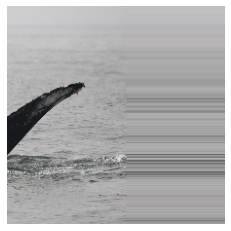

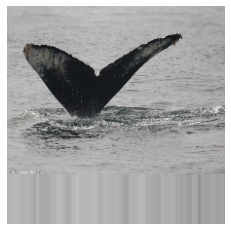

In [ ]:
# Horizontal Shift
transformAndShow(image_path, ty=100)

# New Chart
plt.figure()

# Vertical Shift
transformAndShow(image_path, tx=50)

# Zoom

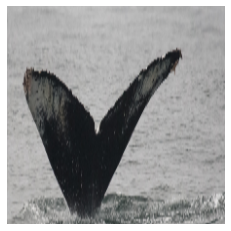

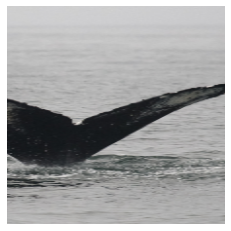

In [ ]:
# Vertical Zoom Transformation
transformAndShow(image_path, zx=.5) # A value of .5 implies 2X zoom

# New Chart
plt.figure()

# Horizontal Zoom Transformation
transformAndShow(image_path, zy=.5) # A value of .5 implies 2X zoom

# Channel Shift Intensity

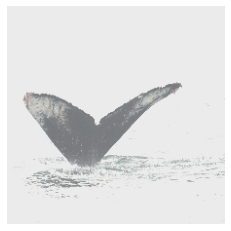

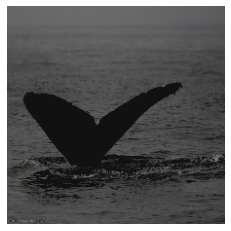

In [ ]:
# Shift to high-tones
transformAndShow(image_path, channel_shift_intensity=100)

# New Figure
plt.figure()

# Shift to low tones
transformAndShow(image_path, channel_shift_intensity=-100)

# Brightness

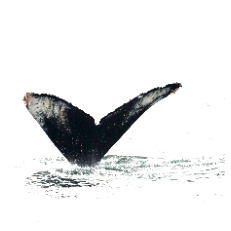

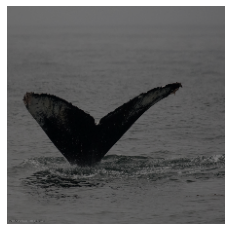

In [ ]:
# 2X Brightness Transformation
transformAndShow(image_path, brightness=2)

# New Figure
plt.figure()

# .5X Brightness Transformation
transformAndShow(image_path, brightness=.5)

# Sample Averaging

In [ ]:
samples = [('turtle.png', [1, 0, 0]), ('tortoise.png', [0, 1, 0]), ('whale.png', [0, 0, 1])]

def load(sample):
  image_url, label = sample
  return loadImage(image_url), label

def mix_value(v1, v2):
  return (np.array(v1) + np.array(v2))/2

"""
  Extracts the images and the labels from the sample.
  Mixes the sample images and the sample labels.
  Returns the mixed sample
"""
def mix_sample(s1, s2):
  (s1_image, s1_label) = s1
  (s2_image, s2_label) = s2
  return (mix_value(s1_image, s2_image), mix_value(s1_label, s2_label))

dataset = map(load, samples)
turtle_sample = (next(dataset)) # Turtle sample
tortoise_sample = (next(dataset)) # Tortoise sample

mixed_image, mixed_label = mix_sample(turtle_sample, tortoise_sample)

[0.5 0.5 0. ]


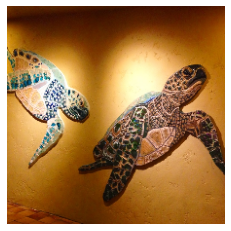

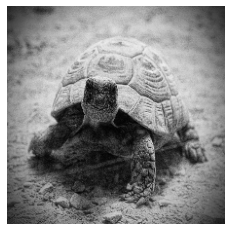

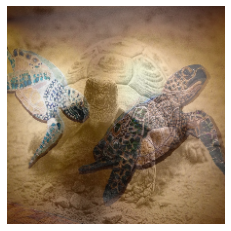

In [ ]:
showImage(turtle_sample[0])
plt.figure()
showImage(tortoise_sample[0])
plt.figure()
showImage(mixed_image)
print(mixed_label)